In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these) # Read the City and Ride Data
city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")

# Combine the data into a single dataset
merged = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
merged.set_index('city')
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
bycity = merged.groupby("city")

#Average Fare
average_fare = pd.DataFrame(bycity["fare"].mean())

#Total Number of Rides
total_rides = pd.DataFrame(bycity["ride_id"].count())
total_rides = total_rides.rename(columns={"ride_id":"total rides"})

#Aggregated DataFrame with x and y values 
citydata = pd.merge(city_data, average_fare, on="city")
city_datas = pd.merge(citydata, total_rides, on="city")
city_datas = city_datas.rename(columns={"fare": "Average Fare"})

city_datas.head()

,city,driver_count,type,Average Fare,total rides
0,Richardfort,38,Urban,22.373214,28
1,Williamsstad,59,Urban,24.362174,23
2,Port Angela,67,Urban,23.836842,19
3,Rodneyfort,34,Urban,28.616957,23
4,West Robert,39,Urban,25.123871,31


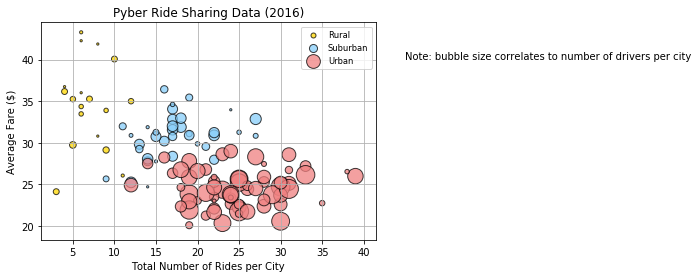

In [11]:
# Build the scatter plots for each city types with graph properties, legend, text label regarding circle size
rural = city_datas[city_datas["type"]=="Rural"]    
urban = city_datas[city_datas["type"]=="Urban"]  
suburban = city_datas[city_datas["type"]=="Suburban"]  

plt.scatter(rural["total rides"], rural["Average Fare"], s = rural["driver_count"]*5, 
            color="Gold", edgecolor = "black", label="Rural", alpha = 0.75)
plt.scatter(suburban["total rides"], suburban["Average Fare"], s = suburban["driver_count"]*5, 
            color="lightskyblue", edgecolor = "black", label="Suburban", alpha = 0.75)
plt.scatter(urban["total rides"], urban["Average Fare"], s = urban["driver_count"]*5,
            color="lightcoral", edgecolor = "black", label="Urban", alpha =0.75)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.text(45, 40, 'Note: bubble size correlates to number of drivers per city')
plt.legend(loc="best", fontsize = "small", fancybox=True)

plt.savefig("Images/Pyber Ride Sharing Data Scatter Plot")
plt.show()

In [4]:
# Calculate Type Percents
fares_by_type = pd.DataFrame(merged.groupby('type')['fare'].sum())
fares_by_type = fares_by_type.rename(columns={"fare":"Total Fares"})
fares_by_type.head()


,Total Fares
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


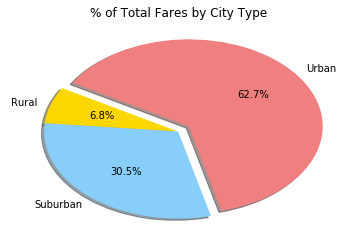

In [5]:
# Build Pie Chart
CityTypes = ["Rural", "Suburban", "Urban"]
Total_Fares = fares_by_type["Total Fares"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.title("% of Total Fares by City Type")
plt.pie(Total_Fares, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle = 150)

# Save Figure
plt.savefig("Images/% of Total Fares by City Type Pie Chart")
plt.show()

In [6]:
 # Calculate Ride Percents
total_rides_bytype = pd.DataFrame(merged.groupby('type')["ride_id"].count())
total_rides_bytype = total_rides_bytype.rename(columns={"ride_id":"Total Rides"})
total_rides_bytype

,Total Rides
type,
Rural,125
Suburban,625
Urban,1625


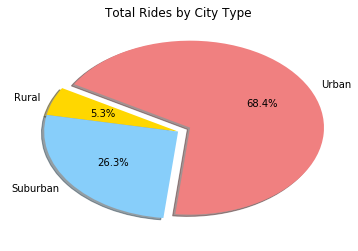

In [7]:
# Build Pie Chart
CityTypes = ["Rural", "Suburban", "Urban"]
Total_Rides = total_rides_bytype["Total Rides"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.title("Total Rides by City Type")
plt.pie(Total_Rides, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle = 150)

# Save Figure
plt.savefig("Images/% Total Rides by City Type")
plt.show()

In [8]:
# Calculate Driver Percents
drivers_bytype = pd.DataFrame(merged.groupby('type')["driver_count"].sum())
drivers_bytype = drivers_bytype.rename(columns={"driver_count":"Total # of Drivers"})
drivers_bytype

,Total # of Drivers
type,
Rural,537
Suburban,8570
Urban,59602


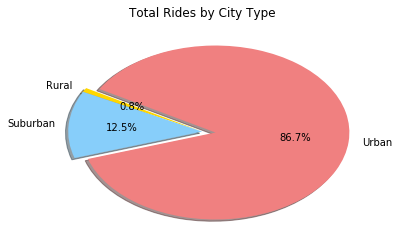

In [9]:
# Build Pie Chart
CityTypes = ["Rural", "Suburban", "Urban"]
Drivers = drivers_bytype["Total # of Drivers"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.title("Total Rides by City Type")
plt.pie(Drivers, explode=explode, labels=CityTypes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle = 150)

# Save Figure
plt.savefig("Images/% of Total Drivers by City Type")
plt.show()